# Prediction of sales margins using exogenous parameter

In [362]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [363]:
import pandas as pd
import numpy as np
from os.path import expanduser
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.pyplot as plt
import matplotx
from statsmodels.tsa.stattools import adfuller
#from featurewiz import featurewiz
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from keras.layers import Dropout

from mlexample.multiclass_example import read_data


HOME=expanduser("~")

In [379]:
dfx=read_data("sales_data.csv")
dfx.shape

(113456, 13)

In [387]:
from mlexample.multiclass_example import pre_process_data
dfi1=pre_process_data(dfx)
dfi1.shape


(113439, 82)

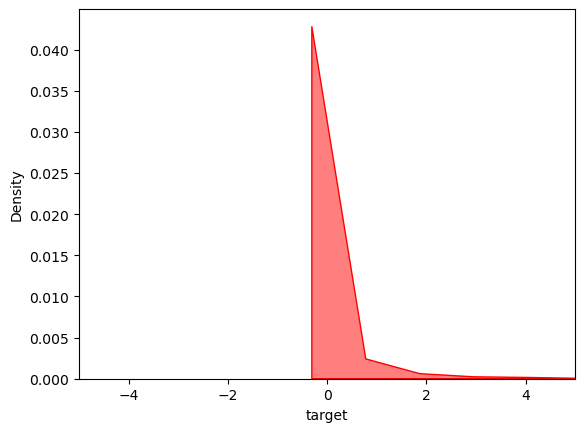

In [388]:
sns.kdeplot(dfi1["target"],fill=True, color="red", alpha=0.5)
plt.xlim(-5,5)
plt.show()

In [389]:
generate_classes(dfi1)
X,y=create_data(dfi1)

X_train, X_test, y_train, y_test, =train_test_split(X,y,test_size=0.2,shuffle=True)

lo=-100.0000...hi=-0.0163
lo=-0.0163...hi=-0.0148
lo=-0.0148...hi=-0.0146
lo=-0.0146...hi=215.7883


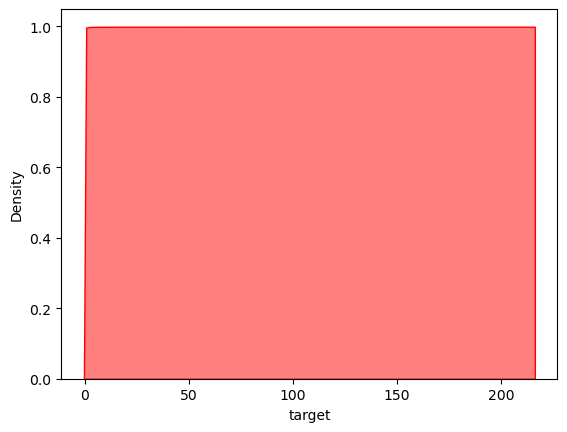

In [390]:
sns.kdeplot(dfi1["target"],fill=True, color="red", alpha=0.5,cumulative=True)

plt.show()

In [391]:
dfi1.shape

(113439, 83)

In [393]:


X, y = create_data(dfi1)
# #df_model=fh2[feature_columns].dropna().copy()
# df_model=dfi1.drop(columns=["target"]).copy()
# X = df_model.drop(columns=["class"]).values
# y = df_model["class"].values

# scaler = MinMaxScaler(feature_range=(0, 1))
# X = scaler.fit_transform(X)
# X = pd.DataFrame(X)
# y = pd.get_dummies(y).astype(np.int8)

X_train, X_test, y_train, y_test, =train_test_split(X,y,test_size=0.2,shuffle=True)

In [376]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [394]:
print(f"X.shape: {X_train.shape}")
print(f"y.shape: {y_train.shape}")

X.shape: (90751, 81)
y.shape: (90751, 4)


In [395]:
# First define baseline model. Then use it in Keras Classifier for the training

from mlexample.multiclass_example import baseline_model
seed=42
model=baseline_model(X,y)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [307]:
history=model.fit(X_train, y_train, epochs=40, batch_size=64, verbose=1, validation_data=(X_test,y_test))

Epoch 1/40
1276/1276 [==============================] - 2s 2ms/step - loss: 1.1145 - accuracy: 0.3811 - val_loss: 1.0628 - val_accuracy: 0.4292
Epoch 2/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0688 - accuracy: 0.4206 - val_loss: 1.0549 - val_accuracy: 0.4405
Epoch 3/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0576 - accuracy: 0.4339 - val_loss: 1.0396 - val_accuracy: 0.4566
Epoch 4/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0429 - accuracy: 0.4489 - val_loss: 1.0218 - val_accuracy: 0.4715
Epoch 5/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0315 - accuracy: 0.4618 - val_loss: 1.0149 - val_accuracy: 0.4843
Epoch 6/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0257 - accuracy: 0.4706 - val_loss: 1.0160 - val_accuracy: 0.4829
Epoch 7/40
1276/1276 [==============================] - 2s 1ms/step - loss: 1.0222 - accuracy: 0.4741 - val_loss: 1.0097 - val_accuracy:

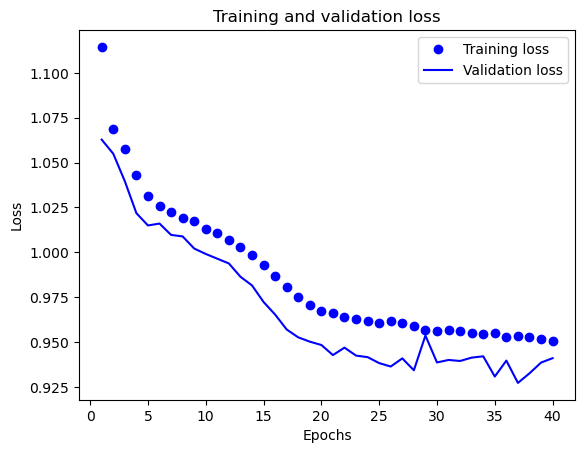

In [308]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [198]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

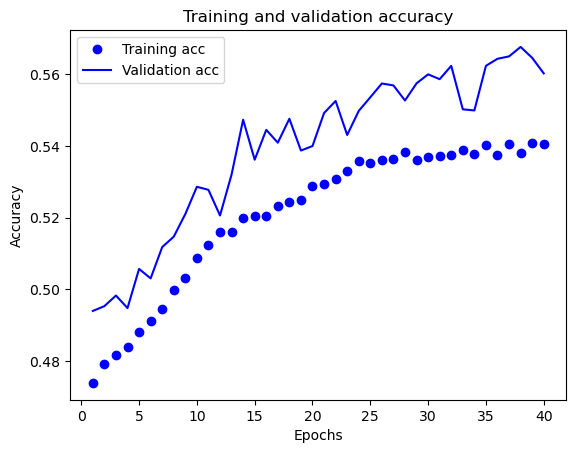

In [227]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [228]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

698/698 [==============================] - 1s 939us/step - loss: 0.9350 - accuracy: 0.5603
test loss, test acc: [0.9349925518035889, 0.5602865219116211]


In [254]:
X.loc[[0,1,400]]

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.007615,0.490253,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.006799,0.537398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400,0.015230,0.477949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
skf = KFold(n_splits = 10, shuffle = True, random_state = seed)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[     0      1      2 ... 111672 111673 111674]
  Test:  index=[    31     35     44 ... 111648 111662 111669]
Fold 1:
  Train: index=[     0      1      2 ... 111671 111673 111674]
  Test:  index=[     3     23     24 ... 111642 111660 111672]
Fold 2:
  Train: index=[     0      1      2 ... 111671 111672 111673]
  Test:  index=[     8     54     75 ... 111652 111665 111674]
Fold 3:
  Train: index=[     0      2      3 ... 111672 111673 111674]
  Test:  index=[     1      7     12 ... 111664 111666 111671]
Fold 4:
  Train: index=[     0      1      2 ... 111672 111673 111674]
  Test:  index=[     4      6     21 ... 111645 111659 111667]
Fold 5:
  Train: index=[     1      2      3 ... 111672 111673 111674]
  Test:  index=[     0     11     13 ... 111646 111649 111653]
Fold 6:
  Train: index=[     0      1      2 ... 111672 111673 111674]
  Test:  index=[     9     10     19 ... 111599 111616 111630]
Fold 7:
  Train: index=[     0      1      2 ... 111671 111672

In [256]:
# Kfold cross validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
cvscores = []
for train, test in kfold.split(X, y):    
    _X = X.loc[train]
    _y = y.loc[train]
    
    #print(train)
    
    _Xtest=X.loc[test]
    _ytest=y.loc[test]
    model=baseline_model(_X,_y)
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(_X, _y, epochs=20, batch_size=64, verbose=0)
    scores = model.evaluate(_Xtest, _ytest, verbose=0)
    print(f"{model.metrics_names[1]}: {scores[1]:.4f}")
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

#estimator = KerasClassifier(build_fn = baseline_model(X,y),epochs = 100, batch_size = 512, verbose = 0)
#kfold = KFold(n_splits = 5, shuffle = True, random_state = seed)
#results = cross_val_score(estimator, X_train, y_train, cv = kfold)
# Result
#print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 0.5511
accuracy: 0.5512
accuracy: 0.5642
accuracy: 0.5586
accuracy: 0.5390
accuracy: 0.5536
accuracy: 0.5583
accuracy: 0.5377
accuracy: 0.5359
accuracy: 0.5472
54.97% (+/- 0.92%)


In [80]:
def build_model(X_train, dropout: bool = True):
    model = models.Sequential()
    num_params=64
    model.add(layers.Dense(num_params,activation='relu',input_shape=(X_train.shape[1],)))
    if dropout:
        model.add(Dropout(0.1))
    model.add(layers.Dense(num_params,activation='relu'))
    if dropout:
        model.add(Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

def build_extended_model(X_train, dropout: bool = True):
    model = models.Sequential()
    num_params=128
    model.add(layers.Dense(num_params,activation='relu',input_shape=(X_train.shape[1],)))
    if dropout:
        model.add(Dropout(0.1))
    model.add(layers.Dense(num_params,activation='relu'))
    if dropout:
        model.add(Dropout(0.1))
    model.add(layers.Dense(num_params,activation='relu'))
    if dropout:
        model.add(Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [373]:
#Degress of freedom
degrees_of_freedom=X_train.shape[0]*X_train.shape[1]
print(degrees_of_freedom)

2432


In [ ]:
# from keras import models
# from keras import layers
# from keras.layers import Dropout

# def build_extended_model2(X_train, num_params,dropout : float = 0):
#     model = models.Sequential()    
#     model.add(layers.Dense(num_params,activation='relu',input_shape=(X_train.shape[1],)))    
#     model.add(Dropout(dropout))    
#     model.add(layers.Dense(num_params,activation='relu'))    
#     model.add(Dropout(dropout))
#     model.add(layers.Dense(1))
#     model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
#     return model

In [406]:
from keras import regularizers
def build_extended_model2(X_train, num_params,dropout : float = 0):
    model = models.Sequential()
    #kernel_regularizer=regularizers.l2(0.001),
    model.add(layers.Dense(num_params,activation='relu',input_shape=(X_train.shape[1],)))
    if dropout > 0:
        model.add(Dropout(dropout))
    #kernel_regularizer=regularizers.l2(0.001),
    model.add(layers.Dense(num_params,activation='relu'))
    if dropout > 0:
        model.add(Dropout(dropout))
    # model.add(layers.Dense(num_params,activation='relu'))
    # if dropout:
    #     model.add(Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


def build_lstm_model(X_train, num_params,dropout : float = 0):
    #model.add(LSTM(units=50, input_shape=(num_timesteps, num_features)))
    model = models.Sequential()
    #kernel_regularizer=regularizers.l2(0.001),
    model.add(layers.Dense(num_params,activation='relu',input_shape=(X_train.shape[1],)))

    model.add(LSTM(num_params, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics =["mae"])
    #model.compile(loss='mean_squared_error', optimizer='adam',metrics =["accuracy"])

    return model

def make_naive_baseline(y_test, y_train):
    """Assume that the sales will be the mean of the training set."""
    y_pred_naive = np.ones(y_test.shape[0]) * y_train.mean()
    return y_pred_naive.reshape(y_test.shape[0], 1)

def make_naive_baselines2(y_test,y_train):
    """
        Assume that the sales will be like the quarter last year
    """
    lag=y_test.shape[0]
    y_pred_naive = np.ones(y_test.shape[0])
    for i in range(lag):
        if i < 12:
            y_pred_naive[i]=y_train[i-12]
        else:
            y_pred_naive[i]=y_pred_naive[i-12]
    return y_pred_naive.reshape(lag,1)

def display_results(y_test,y_train, model, X_train, X_test,cumulative=False):
    yp = model.predict(X_test)
    y_predict = make_naive_baselines2(y_test,y_train)
    #y_predict_mean = make_naive_baseline(y_test,y_train)


    if cumulative:
        display_data([
                    (y_test.cumsum(),'Test','o',10,'dotted','lightgrey'),
                    (y_predict.cumsum(),'naive prediction','o',10,'dotted','coral'),
                    #(y_predict_mean,'naïve (mean) prediction','',5,'dotted','mediumseagreen'),
                    (yp.cumsum(),'ML prediction','v',10,'dotted','deepskyblue')
                    ]
                    ,x=None
                    ,xlabel="Months"
                    ,ylabel="#Sales cumulative (periodics, normed)"
                    ,title="Comparison of test data and naive prediction"
                    )
    else:
        display_data([
            (y_test,'Test','o',10,'dotted','lightgrey'),
            (y_predict,'naive prediction','o',10,'dotted','coral'),
            #(y_predict_mean,'naïve (mean) prediction','',5,'dotted','mediumseagreen'),
            (yp,'ML prediction','v',10,'dotted','deepskyblue')
            ]
            ,x=None
            ,xlabel="Months"
            ,ylabel="#Sales (periodics, normed)"
            ,title="Comparison of test data and naive prediction"
            )

    rmse_keras= mean_squared_error(y_test, yp, squared=False)
    print(f"RMSE ML: {rmse_keras:.4f}")
    rmse_naive= mean_squared_error(y_test, y_predict, squared=False)
    print(f"RMSE naive: {rmse_naive:.4f}")
    acc=(rmse_naive-rmse_keras)/rmse_naive 
    print(f"rel performance: {acc*100:.2f} %")
    #rmse_naive_mean= mean_squared_error(y_test, y_predict_mean, squared=False)
    #print(f"RMSE naïve (µ): {rmse_naive_mean:.4f}")

In [376]:
from tqdm import tqdm
from itertools import product

def run_simulation(df : pd.DataFrame,model_builder, train_data_factory, supervised_creator, test_size : float = 0.2):
    minmodel=None
    test_mae_scoremax=100000
    bestx=None

    X_train, X_test, y_train, y_test, X_data , Y = train_data_factory(df,supervised_creator, lag=2,test_size=test_size)

    epochs=[1000]
    batch_sizes=[1]
    num_params=[64]

    # epochs=[500]
    # batch_sizes=[1,4,8]
    # num_params=[32,64,128]
    dropouts=[0.2]
    size=len(epochs)*len(batch_sizes)*len(num_params)*len(dropouts)#total number of combinations
    print(f"Total number of combinations: {size}")
    idx=0
    for epoch,b_size, num_param, dropout in tqdm(product(epochs,batch_sizes,num_params,dropouts),total=size):
        
        model = model_builder(X_train,num_param,dropout)
        model.fit(X_train, y_train,epochs=epoch, batch_size=b_size, verbose=0)
        test_mse_score, test_mae_score = model.evaluate(X_test, y_test,verbose=0)
        if test_mae_score < test_mae_scoremax:
            minmodel=model
            test_mae_scoremax=test_mae_score
            bestx=(epoch,b_size,num_param,dropout)

    print(f"Best model: {bestx} with {test_mae_scoremax}")
    display_results(y_test,y_train, minmodel, X_train, X_test,False)
    return y_test,y_train, minmodel, X_train, X_test


In [377]:
def r1(df : pd.DataFrame,model_builder, train_data_factory, supervised_creator, test_size : float = 0.2):
    minmodel=None
    test_mae_scoremax=100000
    bestx=None

    X_train, X_test, y_train, y_test, X_data , Y = train_data_factory(df,supervised_creator, lag=2,test_size=test_size)  
    return X_train

X_train =r1(fh,model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_excluding,test_size=0.1)
X_train.shape

(64, 36)

In [428]:
#model.add(LSTM(units=50, input_shape=(num_timesteps, num_features)))

from keras.layers import LSTM, Dense


def p_lstm(df : pd.DataFrame,model,model_builder, train_data_factory, supervised_creator, test_size : float = 0.2):
    minmodel=None
    test_mae_scoremax=100000
    bestx=None

    X, X_test, y_train, y_test, X_data , Y = train_data_factory(df,supervised_creator, lag=2,test_size=test_size)


    n_features = X.shape[1]
    X_train = X.reshape((X.shape[0], 1, X.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))# reshape input to be 3D [samples, timesteps, features], here timestep is 1 since we have created lagged features


    print(X_train.shape)
    epochs=[1500]
    batch_sizes=[2]
    num_params=[64]

    # epochs=[500]
    # batch_sizes=[1,4,8]
    # num_params=[32,64,128]
    dropouts=[0.2]
    size=len(epochs)*len(batch_sizes)*len(num_params)*len(dropouts)#total number of combinations
    print(f"Total number of combinations: {size}")
    idx=0
    print(f"Best model: {bestx} with {test_mae_scoremax}")
    display_results(y_test,y_train, model, X_train, X_test,False)
    return y_test,y_train, minmodel, X_train, X_test

def run_lstm(df : pd.DataFrame,model_builder, train_data_factory, supervised_creator, test_size : float = 0.2):
    minmodel=None
    test_mae_scoremax=100000
    bestx=None

    X, X_test, y_train, y_test, X_data , Y = train_data_factory(df,supervised_creator, lag=2,test_size=test_size)


    n_features = X.shape[1]
    X_train = X.reshape((X.shape[0], 1, X.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))# reshape input to be 3D [samples, timesteps, features], here timestep is 1 since we have created lagged features


    print(X_train.shape)
    epochs=[1500]
    batch_sizes=[2]
    num_params=[64]

    # epochs=[500]
    # batch_sizes=[1,4,8]
    # num_params=[32,64,128]
    dropouts=[0.2]
    size=len(epochs)*len(batch_sizes)*len(num_params)*len(dropouts)#total number of combinations
    print(f"Total number of combinations: {size}")
    idx=0
    for epoch,b_size, num_param, dropout in tqdm(product(epochs,batch_sizes,num_params,dropouts),total=size):        
        model = models.Sequential()
        model.add(LSTM(num_param,activation='relu', return_sequences=True, input_shape=(1,n_features)))
        model.add(Dropout(dropout))
        #model.add(LSTM(num_param,return_sequences=True))#return_sequences0True needed for multiple LST; layers
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics =["mae"])
        model.fit(X_train, y_train,epochs=epoch, batch_size=b_size, verbose=0)
        test_mse_score, test_mae_score = model.evaluate(X_test, y_test,verbose=0)
        if test_mae_score < test_mae_scoremax:
            minmodel=model
            test_mae_scoremax=test_mae_score
            bestx=(epoch,b_size,num_param,dropout)

    print(f"Best model: {bestx} with {test_mae_scoremax}")
    display_results(y_test,y_train, minmodel, X_train, X_test,False)
    return y_test,y_train, minmodel, X_train, X_test

(64, 1, 22)
Total number of combinations: 1
Best model: None with 100000
1/1 [==============================] - 0s 22ms/step


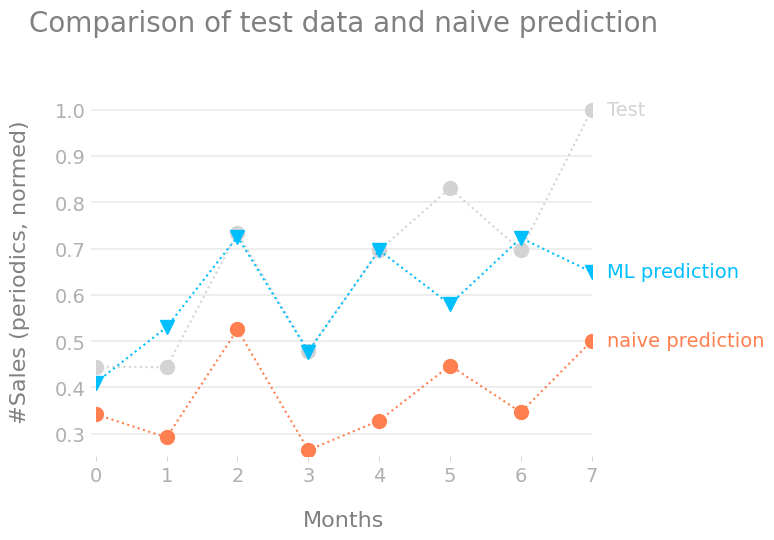

RMSE ML: 0.1562
RMSE naive: 0.3117
rel performance: 49.89 %


(array([[0.44476123],
        [0.44369209],
        [0.73414113],
        [0.47826087],
        [0.69636493],
        [0.83036351],
        [0.69636493],
        [1.        ]]),
 array([[0.4914469 ],
        [0.4657876 ],
        [0.5188881 ],
        [0.21097648],
        [0.53563792],
        [0.49358517],
        [0.6300784 ],
        [0.56664291],
        [0.56486101],
        [0.62295082],
        [0.84354954],
        [0.65894512],
        [0.        ],
        [0.28296507],
        [0.37526728],
        [0.16749822],
        [0.46151105],
        [0.59550962],
        [0.72131148],
        [0.63506771],
        [0.80185317],
        [0.50356379],
        [0.89522452],
        [0.58446187],
        [0.25588026],
        [0.44939416],
        [0.61404134],
        [0.45687812],
        [0.61689237],
        [0.56735567],
        [0.61617962],
        [0.18460442],
        [0.14005702],
        [0.3064861 ],
        [0.81575196],
        [0.55880257],
        [0.41803279],
        

In [421]:
p_lstm(fh[feature_columns],minmodel_ex,model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_excluding,test_size=0.1)

In [431]:
feature_columns

['STK',
 'mth_7',
 'unempl_rt_z',
 'mth_12',
 'mth_1',
 'mth_11',
 'mth_10',
 'mth_9',
 'mth_3',
 'intrst_rt_z',
 'mth_5',
 'vix_z']

(64, 1, 22)
Total number of combinations: 1


100%|██████████| 1/1 [00:53<00:00, 53.19s/it]

Best model: (1500, 2, 64, 0.2) with 0.13231605291366577
1/1 [==============================] - 0s 156ms/step


ValueError: x and y can be no greater than 2D, but have shapes (8,) and (8, 1, 1)

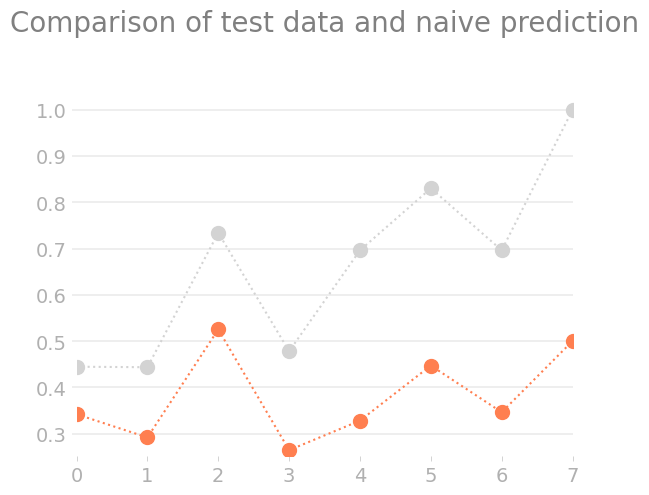

In [429]:
y_test,y_train, minmodel_ex, X_train, X_test=run_lstm(fh[feature_columns],model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_excluding,test_size=0.1)

1/1 [==============================] - 0s 31ms/step


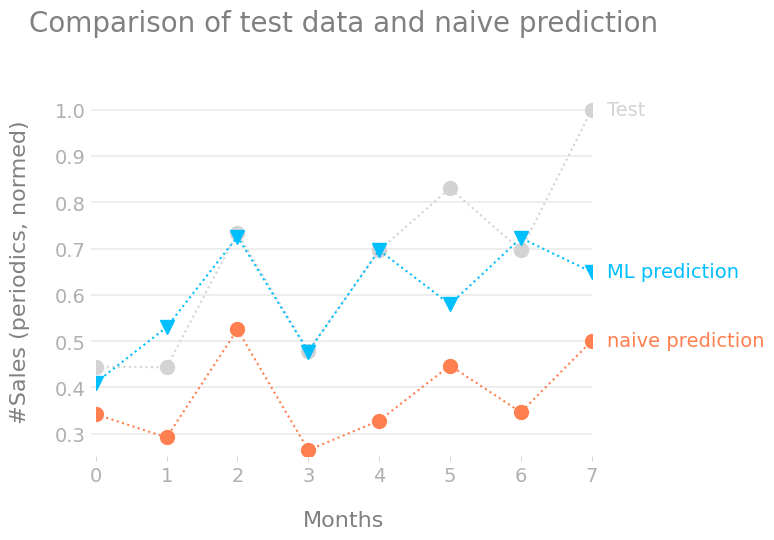

RMSE ML: 0.1562
RMSE naive: 0.3117
rel performance: 49.89 %


In [430]:
display_results(y_test,y_train, minmodel_ex, X_train, X_test,False)

100%|██████████| 12/12 [04:03<00:00, 20.32s/it]

Best model: (1000, 1, 64, 0.2) with 0.18124747276306152
1/1 [==============================] - 0s 48ms/step


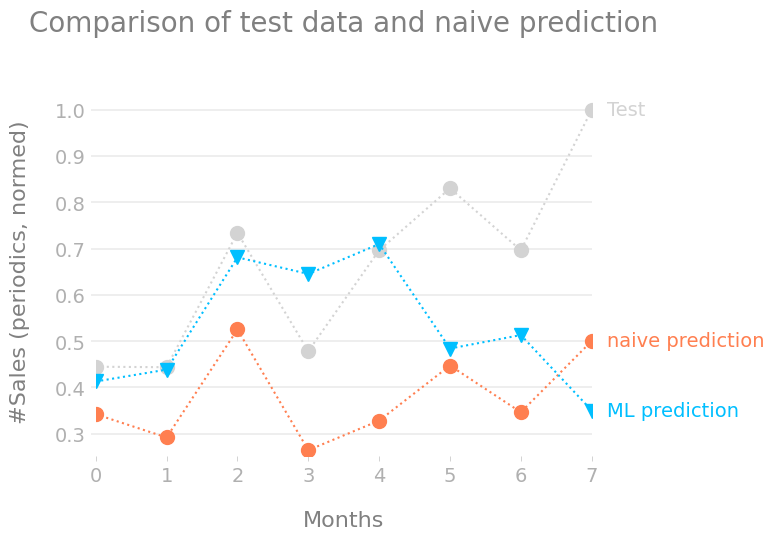

RMSE naïve: 0.3117
Achieved accuracy: 11.58 %


In [326]:
y_test,y_train, minmodel_ex, X_train, X_test=run_simulation(fh,model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_excluding,test_size=0.1)

Total number of combinations: 1


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:48<00:00, 48.70s/it]

Best model: (1000, 1, 64, 0.2) with 0.14137935638427734
1/1 [==============================] - 0s 64ms/step


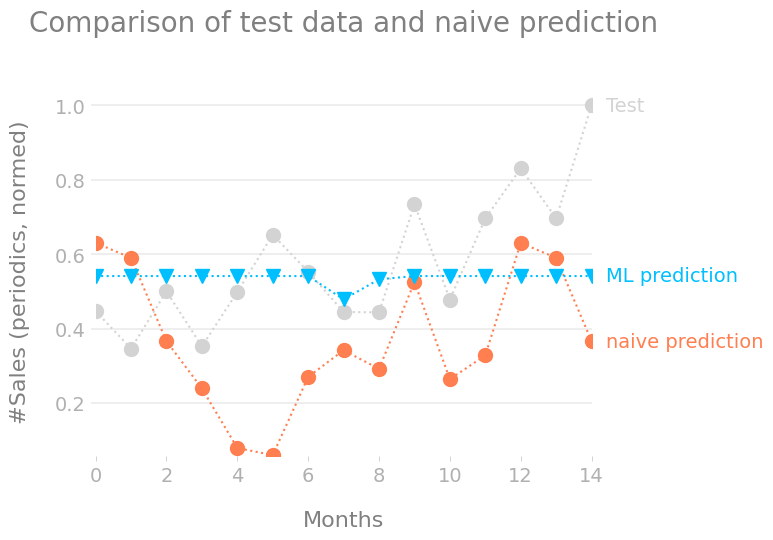

RMSE naïve: 0.3099
Achieved accuracy: 41.64 %


In [341]:
y_test,y_train, minmodel_inc, X_train, X_test=run_simulation(fh,model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_including,test_size=0.2)

In [333]:
print(fh.columns.values)
print(feature_columns)

['STK' 'unempl_rt_z' 'intrst_rt_z' 'gdp_z' 'cpi_rt_z' 'vix_z'
 'business_climate_z' 'mth_1' 'mth_2' 'mth_3' 'mth_4' 'mth_5' 'mth_6'
 'mth_7' 'mth_8' 'mth_9' 'mth_10' 'mth_11' 'mth_12']
['STK', 'mth_7', 'unempl_rt_z', 'mth_12', 'mth_1', 'mth_11', 'mth_10', 'mth_9', 'mth_3', 'intrst_rt_z', 'mth_5', 'vix_z']


Total number of combinations: 1


100%|██████████| 1/1 [00:51<00:00, 51.10s/it]

Best model: (1000, 1, 64, 0.2) with 0.16729424893856049
1/1 [==============================] - 0s 49ms/step


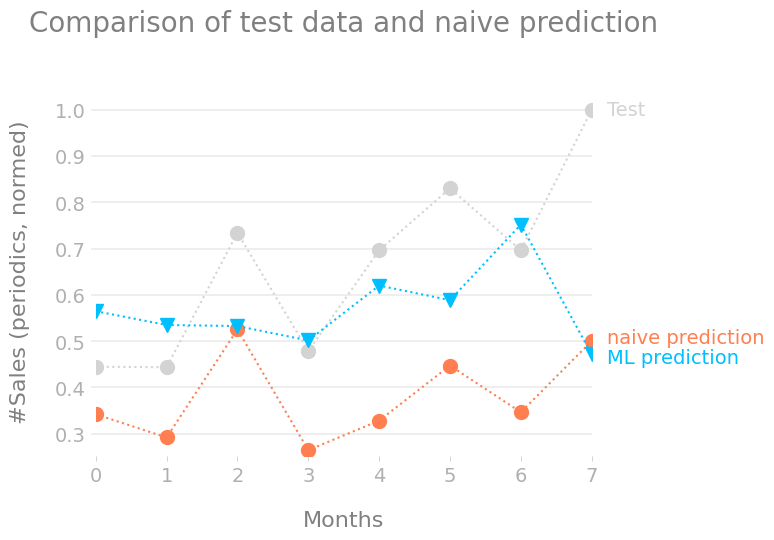

RMSE naïve: 0.3117
Achieved accuracy: 27.30 %


In [338]:
y_test,y_train, minmodel, X_train, X_test=run_simulation(fh[feature_columns].copy(),model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_including,test_size=0.1)

Total number of combinations: 1


100%|██████████| 1/1 [00:47<00:00, 47.82s/it]

Best model: (1000, 1, 64, 0.2) with 0.15096649527549744
1/1 [==============================] - 0s 48ms/step


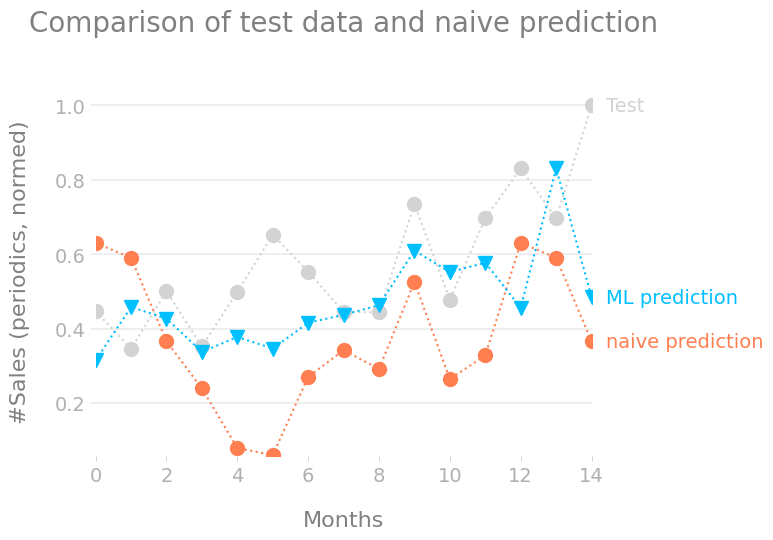

RMSE naïve: 0.3099
Achieved accuracy: 34.28 %


In [342]:
y_test,y_train, minmodela1, X_train, X_test=run_simulation(fh[feature_columns].copy(),model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_including,test_size=0.2)

Total number of combinations: 1


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:52<00:00, 52.23s/it]

Best model: (1000, 1, 64, 0.2) with 0.14246581494808197
1/1 [==============================] - 0s 59ms/step


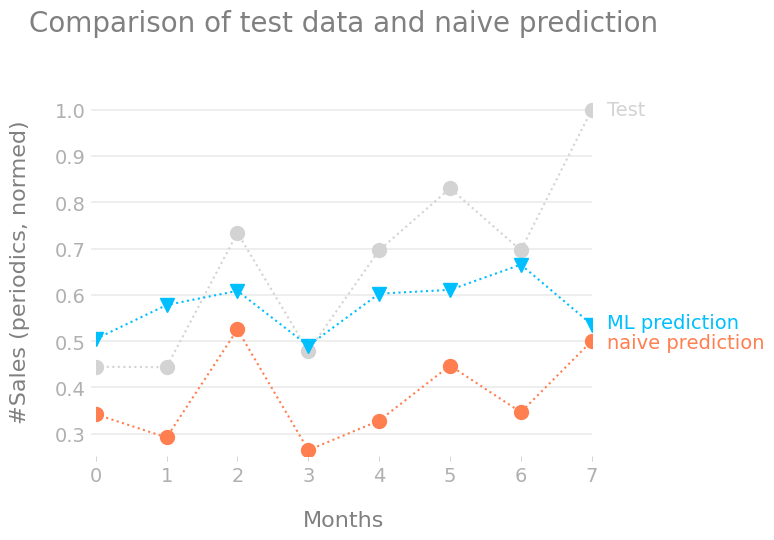

RMSE naïve: 0.3117
Achieved accuracy: 36.77 %


In [339]:
y_test,y_train, minmodelx2, X_train, X_test=run_simulation(fh[feature_columns].copy(),model_builder=build_extended_model2, train_data_factory=create_ml_data, supervised_creator=series_to_supervised_excluding,test_size=0.1)

In [330]:
print(len(y_test))
print(len(y_train))
print(len(fh.index.values))


8
65
74


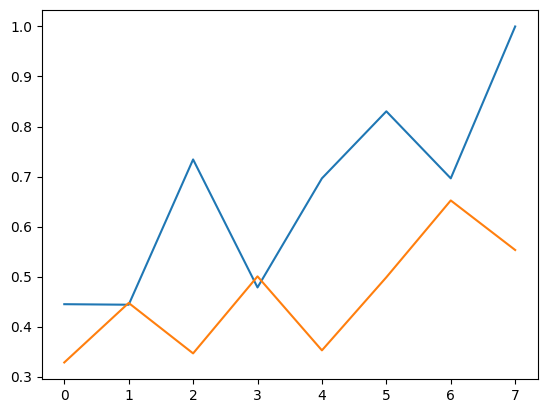

In [332]:
plt.plot(y_test)
xx=y_train[-8:]
plt.plot(xx)
plt.show()

2/2 [==============================] - 0s 2ms/step


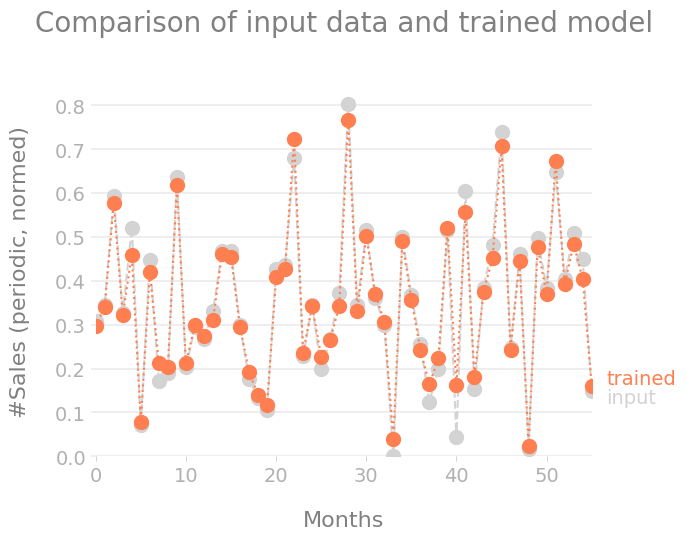

In [236]:

y_predict2=minmodel.predict(X_train)

display_data([(y_train,'input','o',10,'--','lightgrey'),(y_predict2,'trained','o',10,'dotted','coral')]
             ,x=None
             ,xlabel="Months"
             ,ylabel="#Sales (periodic, normed)"
            ,title="Comparison of input data and trained model"
                )


In [343]:
from lazypredict.Supervised import LazyRegressor
cls= LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = cls.fit(X_train, X_test, y_train, y_test)

 31%|███       | 13/42 [00:00<00:01, 21.92it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:01<00:00, 27.31it/s]


In [352]:
predictions.sort_values(by=['RMSE'],ascending=True,inplace=True)
predictions.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,1.81,-0.10,0.19,0.02
QuantileRegressor,1.82,-0.11,0.19,0.08
ExtraTreesRegressor,1.92,-0.25,0.20,0.11
AdaBoostRegressor,1.93,-0.27,0.20,0.12
DummyRegressor,1.93,-0.27,0.20,0.01
ElasticNet,1.93,-0.27,0.20,0.01
Lasso,1.93,-0.27,0.20,0.01
LassoLars,1.93,-0.27,0.20,0.01
PoissonRegressor,1.94,-0.28,0.20,0.01


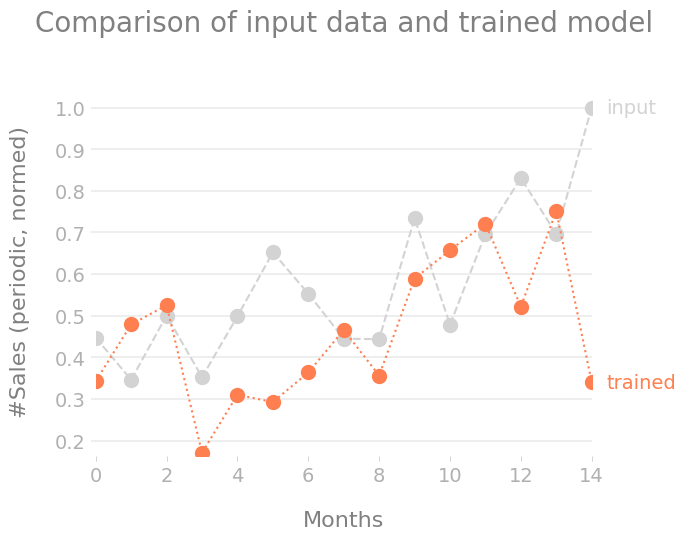

RMSE KNeighbors: 0.2392


In [350]:
#from sklearn.linear_model import PassiveAggressiveRegressor, KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
plx = KNeighborsRegressor(n_neighbors=2)
plx.fit(X_train, y_train)

yhat=plx.predict(X_test)

display_data([(y_test,'input','o',10,'--','lightgrey'),(yhat,'trained','o',10,'dotted','coral')],
             x=None,
             ylabel="#Sales (periodic, normed)",
             xlabel="Months",
             title="Comparison of input data and trained model")

rmse_kneighbors= mean_squared_error(y_test, yhat, squared=False)
print(f"RMSE KNeighbors: {rmse_kneighbors:.4f}")

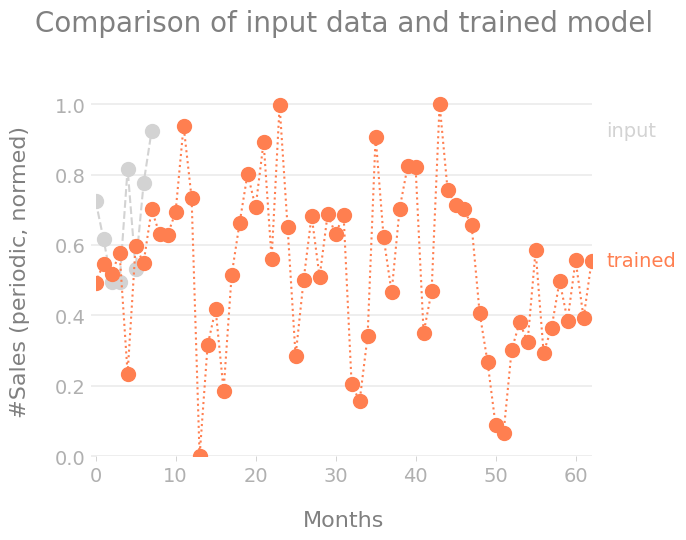

In [156]:
from sklearn.tree import DecisionTreeRegressor
plx = DecisionTreeRegressor(random_state=42)
plx.fit(X_train, y_train)

yhat=plx.predict(X_train)

display_data([(y_test,'input','o',10,'--','lightgrey'),(yhat,'trained','o',10,'dotted','coral')],
             x=None,
             ylabel="#Sales (periodic, normed)",
             xlabel="Months",
             title="Comparison of input data and trained model")

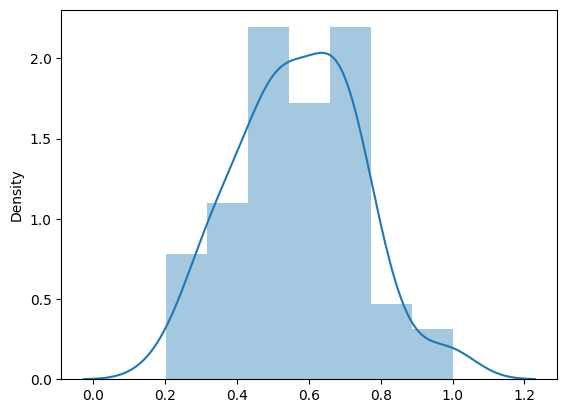

In [100]:
import seaborn as sns
sns.distplot(y_train, hist=True, rug=False,norm_hist=True)
plt.show()

In [232]:
fh4=fh[columns].dropna().copy()

fx=fh4.corr()

display(fx)


,STK,unempl_rt_z,intrst_rt_z,gdp_z,cpi_rt_z,vix_z,business_climate_z
STK,1.000000,0.006860,-0.005871,0.239740,-0.014798,-0.169753,0.325611
unempl_rt_z,0.006860,1.000000,0.169171,-0.567729,-0.175832,-0.279392,-0.268774
intrst_rt_z,-0.005871,0.169171,1.000000,-0.094594,-0.047486,0.054829,0.042641
gdp_z,0.239740,-0.567729,-0.094594,1.000000,-0.061713,0.150717,0.472688
cpi_rt_z,-0.014798,-0.175832,-0.047486,-0.061713,1.000000,-0.034155,-0.102011
vix_z,-0.169753,-0.279392,0.054829,0.150717,-0.034155,1.000000,-0.266896
business_climate_z,0.325611,-0.268774,0.042641,0.472688,-0.102011,-0.266896,1.000000


In [160]:
print(X_test)

[[-0.02230951 -0.92715276]
 [-0.3123332  -0.21767962]
 [-0.45734505 -0.77020782]
 [ 0.26771418 -0.48429618]
 [ 0.12270233  1.34997954]]


In [152]:
import matplotlib.style as style
style.use('fivethirtyeight')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
regr = RandomForestRegressor(max_depth=8, random_state=42)
#regr = GradientBoostingRegressor()
regr.fit(X_train, y_train)



RandomForestRegressor(max_depth=8, random_state=42)

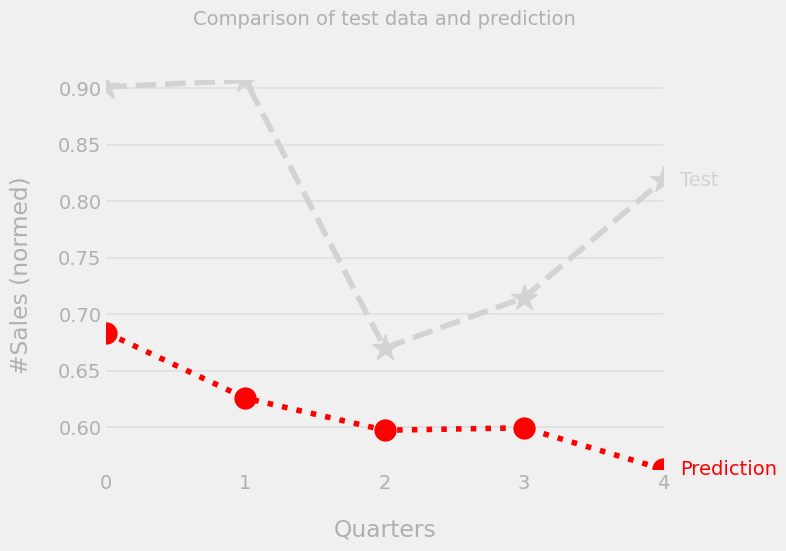

In [174]:

y_predict2=regr.predict(X_test)



display_data(
        [(y_predict2,'Prediction','o',15,'dotted'),(y_test,'Test','*',20,'--')],
        'Quarters',
        '#Sales (normed)',
        'Comparison of test data and prediction'
        )


,STK
DATE,
2017-03-31,2282
2017-06-30,17753
2017-09-30,18057
2017-12-31,17885
2018-03-31,19026
2018-06-30,19681
2018-09-30,19297
2018-12-31,16245
2019-03-31,19500


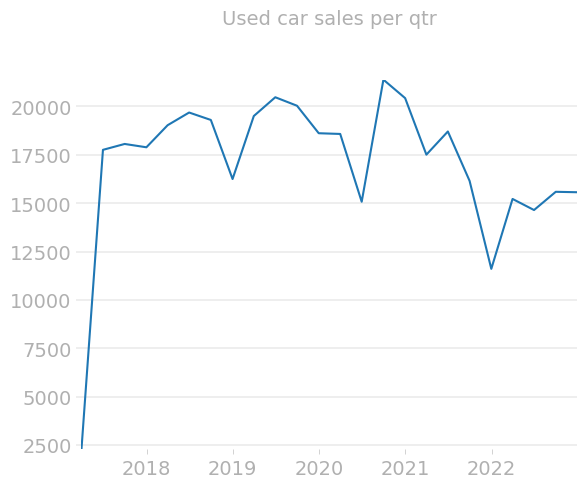

In [305]:
gwu=dfc.loc["2017-01-01":"2022-12-31"]



gw_yearu=gwu["STK"].resample("Q").sum()

display(gw_yearu.to_frame())
gw_yearu.to_frame().to_parquet(f"{HOME}/Downloads/sales_qtr.parquet")


import matplotx

with plt.style.context(matplotx.styles.dufte):
    # yvalues=d_gw1["STK"].values
    # xpos=range(len(yvalues))
    # plt.plot(xpos,yvalues,label="GW")

    # yvalues_nw=d_nw1["STK"].values
    # plt.plot(xpos,yvalues_nw,label="NW")
    plt.plot(gw_yearu,label="Used cars")
    plt.title(f"{title}")
    plt.show()

#display(gw_yearu.cumsum())

In [310]:
corr_df = pd.concat([all_diff, gw_yearu], axis=1).dropna()
corr_df.drop(columns=["PERIOD"],inplace=True)
display(corr_df)

,reg_unemployment_rate_monthly,long_term_interest_rate,gdp_quarterly,cpi_monthly,vix,disposable_income_chg,num_crash,STK
DATE,,,,,,,,
2017-03-31,-0.134848,0.139318,8573.5,0.596325,-2.267121,1.10,0.0,2282.0
2017-06-30,-0.133333,-0.014506,6691.5,-0.211424,-0.268182,-0.28,2784.0,17753.0
2017-09-30,-0.098485,0.110488,4600.4,0.129719,-0.545152,0.21,798.0,18057.0
2017-12-31,-0.098485,-0.055978,6970.3,-0.130687,-0.656515,0.77,-509.0,17885.0
2018-03-31,-0.168695,0.222921,-4478.4,-0.090950,6.936357,2.19,-3469.0,19026.0
2018-06-30,-0.132821,-0.129000,5994.3,0.409100,-1.843932,-0.49,4817.0,19681.0
2018-09-30,-0.099005,-0.110685,-6900.4,0.145765,-2.421427,-0.68,-412.0,19297.0
2018-12-31,-0.100000,-0.008667,6342.8,0.108789,8.270597,0.97,-711.0,16245.0
2019-03-31,-0.034328,-0.232922,5088.4,-0.625203,-4.619776,1.09,-2938.0,19500.0


In [311]:
corr_df.corr()

,reg_unemployment_rate_monthly,long_term_interest_rate,gdp_quarterly,cpi_monthly,vix,disposable_income_chg,num_crash,STK
reg_unemployment_rate_monthly,1.000000,0.041963,-0.588062,-0.441012,0.045525,-0.462719,0.080643,-0.012801
long_term_interest_rate,0.041963,1.000000,-0.027259,0.473806,0.103106,-0.095749,-0.014424,-0.361026
gdp_quarterly,-0.588062,-0.027259,1.000000,-0.029669,-0.464115,0.699877,0.258831,0.161153
cpi_monthly,-0.441012,0.473806,-0.029669,1.000000,0.054287,-0.203415,-0.003797,-0.298078
vix,0.045525,0.103106,-0.464115,0.054287,1.000000,0.074583,-0.444921,-0.082072
disposable_income_chg,-0.462719,-0.095749,0.699877,-0.203415,0.074583,1.000000,-0.183129,0.061348
num_crash,0.080643,-0.014424,0.258831,-0.003797,-0.444921,-0.183129,1.000000,0.046870
STK,-0.012801,-0.361026,0.161153,-0.298078,-0.082072,0.061348,0.046870,1.000000


#Feature Analysis

In [327]:
from featurewiz import featurewiz
#features = featurewiz(corr_df,target='STK', corr_limit=0.80,verbose=2)

#No Use a much simpler model

(20, 8)
(20, 1)
1/1 [==============================] - 0s 183ms/step - loss: 0.1031 - mae: 0.2061
Batch size 1 is better
1/1 [==============================] - 0s 148ms/step - loss: 0.1135 - mae: 0.1826
Batch size 32 is better
1/1 [==============================] - 0s 68ms/step


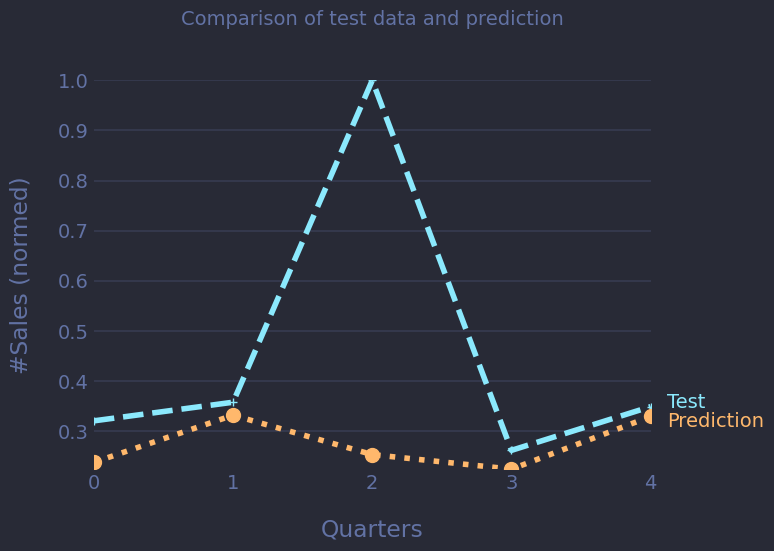

array([[0.23737007],
       [0.3314724 ],
       [0.2528734 ],
       [0.22382617],
       [0.328957  ]], dtype=float32)

In [321]:
feature_columns=['STK', 'unempl_rt_z', 'intrst_rt_z', 'gdp_z', 'cpi_rt_z', 'vix_z','disp_inc_z', 'business_climate_z', 'num_acc_z']
pdf=fh[feature_columns].dropna().copy()

X_train, X_test, y_train, y_test = create_ml_data(pdf)
print(X_train.shape)
print(y_train.shape)
minmodels=None
test_mae_scoremax=100000
for b_size in [1,2,4,8,16,32]:
    model = build_model()
    model.fit(X_train, y_train,epochs=100, batch_size=b_size, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
    if test_mae_score < test_mae_scoremax:
        minmodels=model
        test_mae_scoremax=test_mae_score
        print(f"Batch size {b_size} is better")

display_prediction(minmodels,X_test,y_test)

1/1 [==============================] - 0s 21ms/step


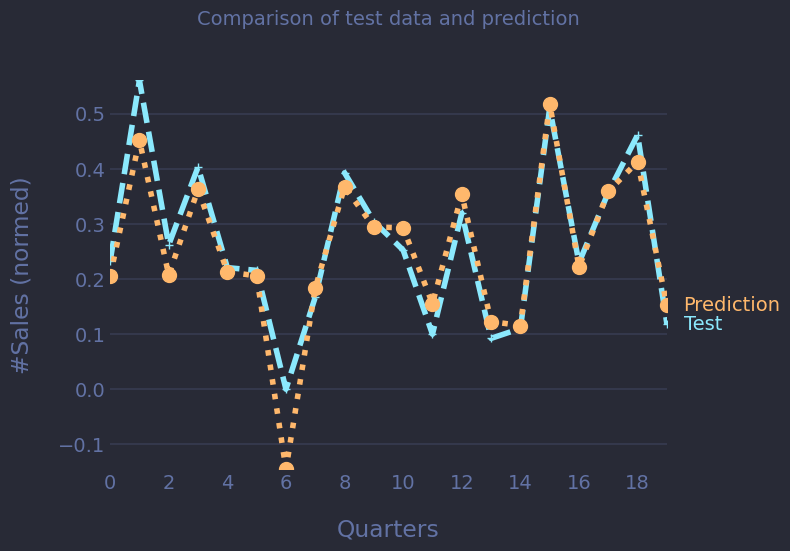

array([[ 0.20518029],
       [ 0.4519129 ],
       [ 0.20716271],
       [ 0.36249852],
       [ 0.21314937],
       [ 0.20548353],
       [-0.14510289],
       [ 0.18343344],
       [ 0.3670275 ],
       [ 0.29436904],
       [ 0.29293504],
       [ 0.15524694],
       [ 0.3537512 ],
       [ 0.12281958],
       [ 0.1154778 ],
       [ 0.5179302 ],
       [ 0.22173148],
       [ 0.35883954],
       [ 0.41285005],
       [ 0.15216413]], dtype=float32)

In [322]:
display_prediction(minmodels,X_train,y_train)

(20, 4)
(20, 1)
1/1 [==============================] - 0s 143ms/step - loss: 0.1251 - mae: 0.2049
Batch size 1 is better
1/1 [==============================] - 0s 66ms/step


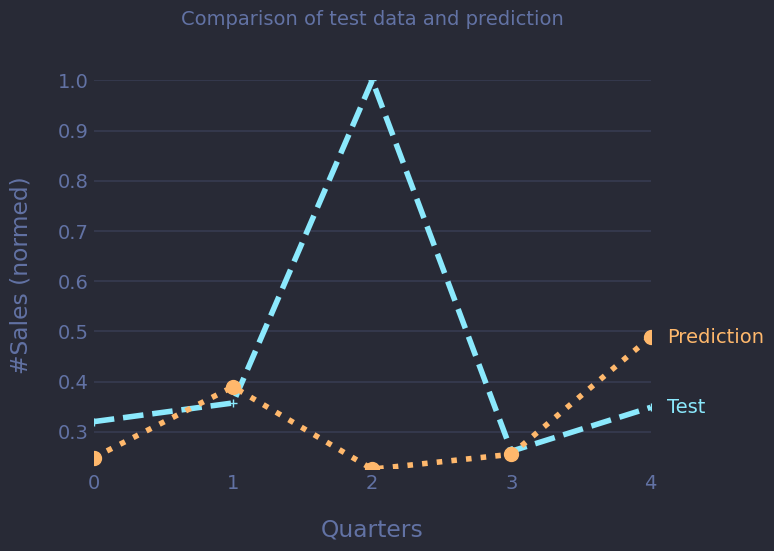

array([[0.24859193],
       [0.38970098],
       [0.2255899 ],
       [0.25524727],
       [0.48876506]], dtype=float32)

In [331]:
#feature_columns=['STK', 'unempl_rt_z', 'intrst_rt_z', 'gdp_z', 'cpi_rt_z', 'vix_z','disp_inc_z', 'business_climate_z', 'num_acc_z']
feature_columns2=['STK','business_climate_z', 'num_acc_z', 'unempl_rt_z','intrst_rt_z']
pdf=fh[feature_columns2].dropna().copy()

X_train, X_test, y_train, y_test = create_ml_data(pdf)
print(X_train.shape)
print(y_train.shape)
minmodels=None
test_mae_scoremax=100000
for b_size in [1,2,4,8,16,32]:
    model = build_model()
    model.fit(X_train, y_train,epochs=100, batch_size=b_size, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
    if test_mae_score < test_mae_scoremax:
        minmodels=model
        test_mae_scoremax=test_mae_score
        print(f"Batch size {b_size} is better")

display_prediction(minmodels,X_test,y_test)

1/1 [==============================] - 0s 23ms/step


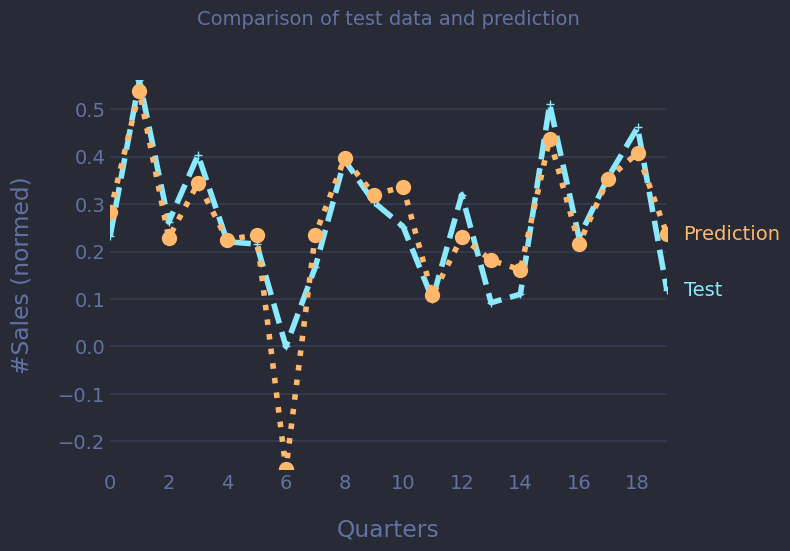

array([[ 0.28363925],
       [ 0.537866  ],
       [ 0.22892818],
       [ 0.344251  ],
       [ 0.22419742],
       [ 0.2356647 ],
       [-0.25833568],
       [ 0.23495221],
       [ 0.39644215],
       [ 0.3199421 ],
       [ 0.3361233 ],
       [ 0.10773095],
       [ 0.23003489],
       [ 0.1817389 ],
       [ 0.1616067 ],
       [ 0.43795514],
       [ 0.21599728],
       [ 0.35377565],
       [ 0.40762496],
       [ 0.2366041 ]], dtype=float32)

In [326]:
display_prediction(minmodels,X_train,y_train)

(20, 4)
(20, 1)
1/1 [==============================] - 0s 95ms/step - loss: 0.0651 - mae: 0.2289
Batch size 1 is better
1/1 [==============================] - 0s 115ms/step - loss: 0.0305 - mae: 0.1529
Batch size 2 is better
1/1 [==============================] - 0s 46ms/step


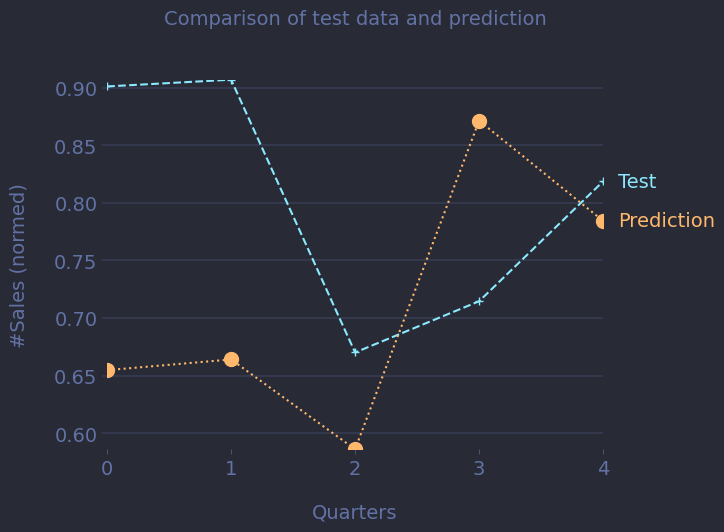

In [347]:
pdf=fh[['STK','long_term_interest_rate_z', 'cpi_monthly_z', 'gdp_quarterly_z', 'reg_unemployment_rate_monthly_z']].dropna().copy()

X_train, X_test, y_train, y_test = create_ml_data(pdf)
print(X_train.shape)
print(y_train.shape)
minmodels=None
test_mae_scoremax=100000
for b_size in [1,2,4,8,16,32]:
    model = build_model()
    model.fit(X_train, y_train,epochs=100, batch_size=b_size, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
    if test_mae_score < test_mae_scoremax:
        minmodels=model
        test_mae_scoremax=test_mae_score
        print(f"Batch size {b_size} is better")

display_prediction(minmodels,X_test,y_test)

In [320]:
display_prediction(minmodels,X_train,y_train)

NameError: name 'minmodels' is not defined

In [225]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
feature_columns=['STK', 'unempl_rt_z', 'intrst_rt_z', 'gdp_z', 'cpi_rt_z', 'vix_z','disp_inc_z', 'business_climate_z', 'num_acc_z']
fh5=df_used[feature_columns].dropna().copy()
#Yep, a bad outlook regardin gbusiness climate leads to higher unemployment
gc_res = grangercausalitytests(fh5[['business_climate_z','unempl_rt_z']], 2,verbose=True)
for k,d in gc_res.items():
    #print(d[0])
    gc_test=d[0]
    p_value=gc_test["ssr_ftest"][1] 
    print(p_value)

KeyError: "['unempl_rt_z', 'intrst_rt_z', 'gdp_z', 'cpi_rt_z', 'vix_z', 'disp_inc_z', 'business_climate_z', 'num_acc_z'] not in index"

In [201]:
feature_columns=['STK', 'unempl_rt_z', 'intrst_rt_z', 'gdp_z', 'cpi_rt_z', 'vix_z','disp_inc_z', 'business_climate_z', 'num_acc_z']
fh5=fh[feature_columns].dropna().copy()
#Yep, a bad outlook regardin gbusiness climate leads to higher unemployment
gc_res = grangercausalitytests(fh[['business_climate_z','unempl_rt_z']], 2,verbose=True)
for k,d in gc_res.items():
    #print(d[0])
    gc_test=d[0]
    p_value=gc_test["ssr_ftest"][1] 
    print(p_value)

KeyError: "['disp_inc_z', 'num_acc_z'] not in index"

In [226]:
#Yep, a bad outlook regardin gbusiness climate leads to higher unemployment
gc_res = grangercausalitytests(fh[['business_climate_z','unempl_rt_z']], 2,verbose=True)
for k,d in gc_res.items():
    #print(d[0])
    gc_test=d[0]
    p_value=gc_test["ssr_ftest"][1] 
    print(p_value)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1763  , p=0.0056  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=8.5267  , p=0.0035  , df=1
likelihood ratio test: chi2=8.0644  , p=0.0045  , df=1
parameter F test:         F=8.1763  , p=0.0056  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6564  , p=0.0776  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=5.7092  , p=0.0576  , df=2
likelihood ratio test: chi2=5.4942  , p=0.0641  , df=2
parameter F test:         F=2.6564  , p=0.0776  , df_denom=67, df_num=2
0.005588397907914423
0.0775897711626264


In [319]:
for feature_col in feature_columns:
    if feature_col != "STK":
        gc_res = grangercausalitytests(fh5[[feature_col,'STK']], 3,verbose=False)
        pmax=0.2
        for k,d in gc_res.items():
            #print(d[0])
            gc_test=d[0]
            p_value=gc_test["ssr_ftest"][1] 
            if p_value < pmax:
                print(f"{feature_col} is causing STK with p={p_value:.4f}")

cpi_rt_z is causing STK with p=0.1034
cpi_rt_z is causing STK with p=0.1535
disp_inc_z is causing STK with p=0.1934
disp_inc_z is causing STK with p=0.1951


In [165]:
print(y_train.mean())
print(y_test.mean())
print(y_train.std())
print(y_test.std())

0.1355791859147563
0.11999186495830781
0.37805928766809976
0.3352171243516778


In [227]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(fh[['unempl_rt_z','business_climate_z']], 2,verbose=True)
for k,d in gc_res.items():
    #print(d[0])
    gc_test=d[0]
    p_value=gc_test["ssr_ftest"][1] 
    print(p_value)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.0341 , p=0.0001  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=17.7642 , p=0.0000  , df=1
likelihood ratio test: chi2=15.8998 , p=0.0001  , df=1
parameter F test:         F=17.0341 , p=0.0001  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.4807 , p=0.0001  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=24.6748 , p=0.0000  , df=2
likelihood ratio test: chi2=21.2175 , p=0.0000  , df=2
parameter F test:         F=11.4807 , p=0.0001  , df_denom=67, df_num=2
9.983457530283358e-05
5.1598499116538176e-05


In [172]:
import shap
shap.initjs()

In [175]:
explainer = shap.Explainer(minmodel, X_test, model_output="regression")

shap_values=explainer.shap_values(X_test)


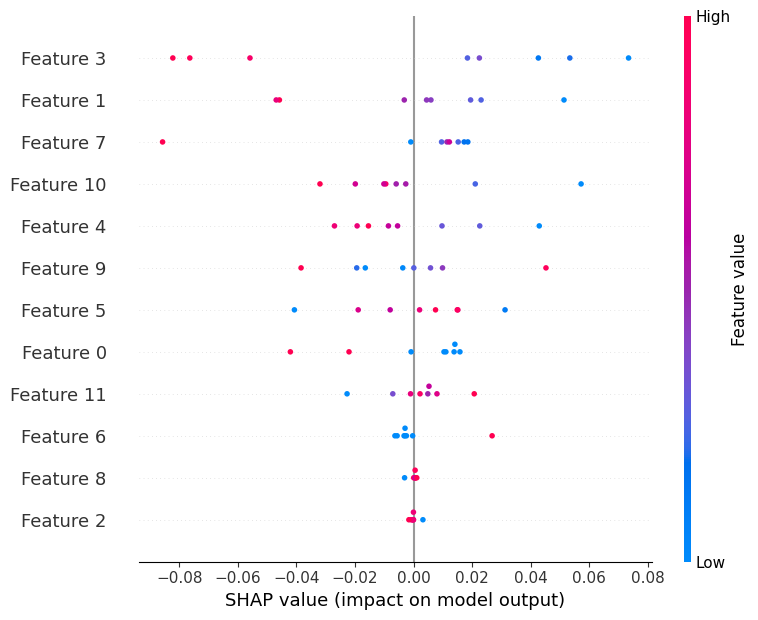

In [176]:
shap.summary_plot(shap_values, X_test)

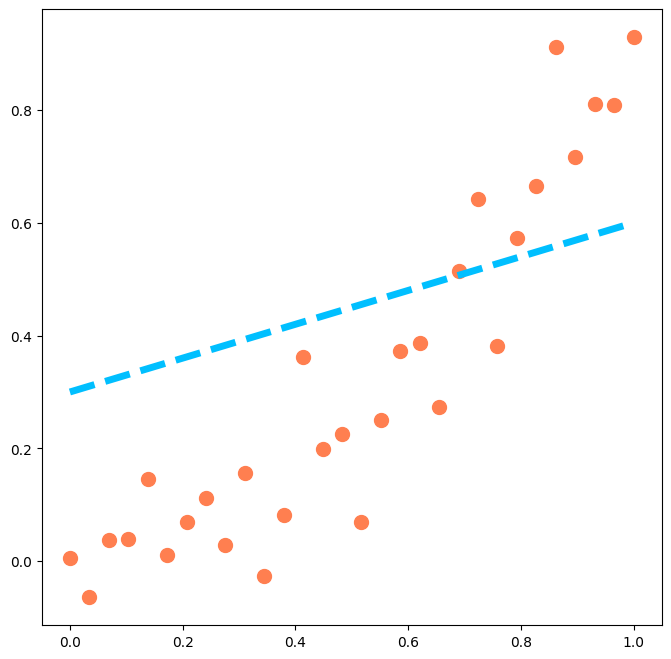

In [223]:
xa=np.linspace(0,1,30)
xy=xa**2.2+np.random.normal(0,0.1,30)
xyb=0.3*xa+0.3

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.scatter(xa,xy,color='coral',marker='o',s=100)
plt.plot(xa,xyb,linestyle='--',color='deepskyblue',linewidth=5)
#ax.set
plt.show()

In [ ]:
\begin{bmatrix}
y_0 \\
y_1 
\end{bmatrix}
=
\begin{bmatrix}
w_{0,0} & w_{0,1} \\
w_{1,0} & w_{1,1} 
\end{bmatrix}
\times
\begin{bmatrix}
a_0 \\
a_1 
\end{bmatrix}
+
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}


\begin{bmatrix}
\delta y_0 \\
\delta y_1 
\end{bmatrix}
=\begin{bmatrix}
y_0 \\
y_1 
\end{bmatrix}
-
\begin{bmatrix}
\text{real value}_0 \\
\text{real value}_1 
\end{bmatrix}

\begin{bmatrix}
\tilde w_{0,0} & \tilde w_{0,1} \\
\tilde w_{1,0} & \tilde w_{1,1} 
\end{bmatrix}


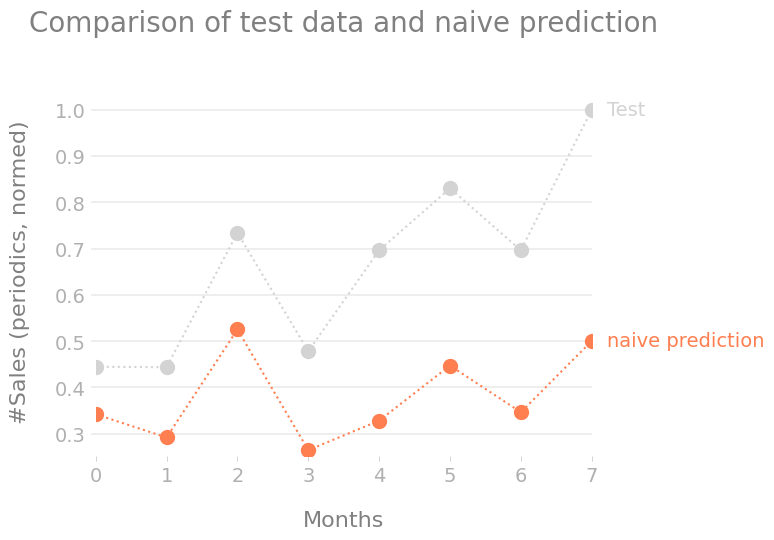

In [432]:
def display_results(y_test,y_train, model, X_train, X_test,cumulative=False):
    # yp = model.predict(X_test)
    y_predict = make_naive_baselines2(y_test,y_train)
    #y_predict_mean = make_naive_baseline(y_test,y_train)


    if cumulative:
        display_data([
                    (y_test.cumsum(),'Test','o',10,'dotted','lightgrey'),
                    (y_predict.cumsum(),'naive prediction','o',10,'dotted','coral'),
                    #(y_predict_mean,'naïve (mean) prediction','',5,'dotted','mediumseagreen'),
                    (yp.cumsum(),'ML prediction','v',10,'dotted','deepskyblue')
                    ]
                    ,x=None
                    ,xlabel="Months"
                    ,ylabel="#Sales cumulative (periodics, normed)"
                    ,title="Comparison of test data and naive prediction"
                    )
    else:
        display_data([
            (y_test,'Test','o',10,'dotted','lightgrey'),
            (y_predict,'naive prediction','o',10,'dotted','coral'),
            #(y_predict_mean,'naïve (mean) prediction','',5,'dotted','mediumseagreen'),
            # (yp,'ML prediction','v',10,'dotted','deepskyblue')
            ]
            ,x=None
            ,xlabel="Months"
            ,ylabel="#Sales (periodics, normed)"
            ,title="Comparison of test data and naive prediction"
            )

display_results(y_test,y_train, minmodel_ex, X_train, X_test,False)